<a href="https://colab.research.google.com/github/Mahdizarei/network_analysis/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [ ]:

# --------------------------
# Load MNIST dataset
# --------------------------
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape to include channel dimension (grayscale = 1)
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0  # Normalize to 0-1
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# Labels are already integers 0-9, suitable for sparse_categorical_crossentropy



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


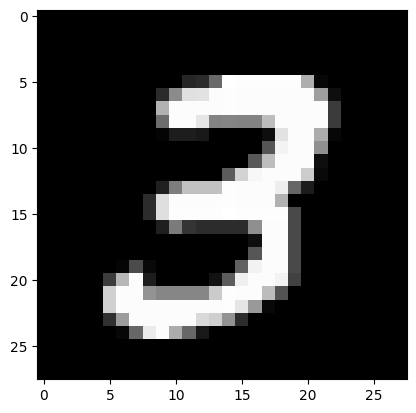

In [ ]:
plt.imshow(X_train[7], cmap='gray')

In [ ]:

# --------------------------
# Create CNN model
# --------------------------
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# --------------------------
# Compile model
# --------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --------------------------
# Train model
# --------------------------
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# --------------------------
# Evaluate on test data
# --------------------------
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.8637 - loss: 0.4562 - val_accuracy: 0.9798 - val_loss: 0.0686
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.9800 - loss: 0.0631 - val_accuracy: 0.9827 - val_loss: 0.0585
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.9884 - loss: 0.0382 - val_accuracy: 0.9850 - val_loss: 0.0478
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.9904 - loss: 0.0322 - val_accuracy: 0.9868 - val_loss: 0.0456
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 51ms/step - accuracy: 0.9922 - loss: 0.0256 - val_accuracy: 0.9888 - val_loss: 0.0396
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9879 - loss: 0.0374
Test Accuracy: 0.9905999898910522


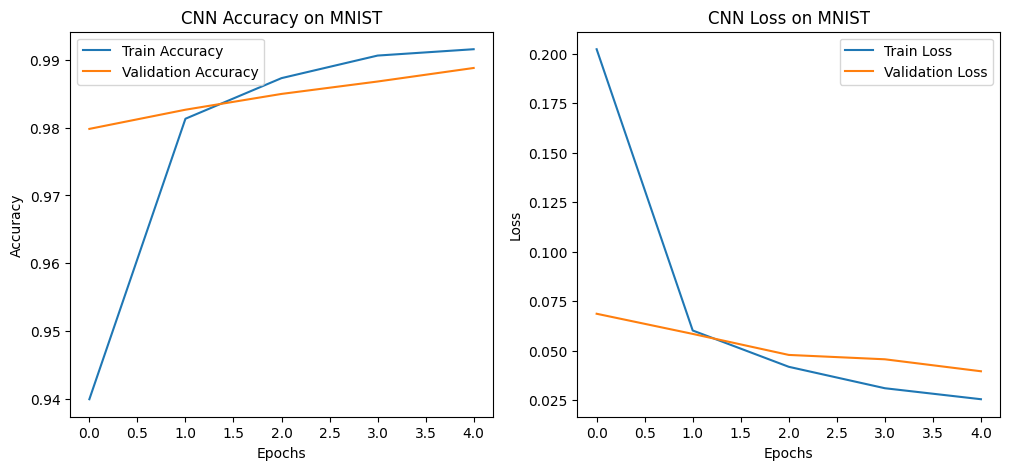

In [ ]:

# --------------------------
# Plot training history
# --------------------------
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy on MNIST')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss on MNIST')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:

'''
# Load the MNIST dataset (handwritten digits) using TensorFlow/Keras
# Returns: (X_train, y_train), (X_test, y_test)
# X_train: 60,000 images (28x28 uint8, 0-255 range)
# y_train: 60,000 labels (0-9 integers)
# X_test: 10,000 images, y_test: 10,000 labels
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape images to include channel dimension for CNN compatibility
# Original shape: (60000, 28, 28) -> New shape: (60000, 28, 28, 1)
# -1 infers batch size automatically, 1 channel for grayscale images
X_train = X_train.reshape(-1, 28, 28, 1)

# Normalize pixel values from [0, 255] to [0, 1] range
# Improves gradient flow and training stability for neural networks
X_train = X_train / 255.0

# Apply identical preprocessing to test data for consistency
X_test = X_test.reshape(-1, 28, 28, 1)
X_test = X_test / 255.0

'''



'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a Convolutional Neural Network (CNN) for image classification (e.g., MNIST digits)
model = Sequential([
    # First convolutional layer:
    # - 32 filters of size 3x3
    # - ReLU activation to add non-linearity
    # - Input shape = 28x28 grayscale images (1 channel)
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),

    # First pooling layer:
    # - Downsamples the feature map by taking the max in each 2x2 window
    # - Reduces spatial size and computation
    MaxPooling2D((2, 2)),

    # Second convolutional layer:
    # - 64 filters of size 3x3 to learn more complex features
    Conv2D(64, (3, 3), activation='relu'),

    # Second pooling layer:
    # - Further reduces spatial dimensions
    MaxPooling2D((2, 2)),

    # Flatten layer:
    # - Converts the 2D feature maps into a 1D vector
    # - Prepares data for the fully connected layers
    Flatten(),

    # Fully connected (dense) hidden layer:
    # - 64 neurons with ReLU activation for non-linearity and feature combination
    Dense(64, activation='relu'),

    # Output layer:
    # - 10 neurons (one per class for digits 0–9)
    # - Softmax activation outputs class probabilities
    Dense(10, activation='softmax')
])

'''